<a href="https://colab.research.google.com/github/LuanK63/6351071043_LAB3/blob/main/6351071043_LAB3_Bai6(Trang26).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

6. (Lập trình) Sử dụng thuật toán k-Means để giảm số màu trong ảnh từ đó giảm kích
thước file ảnh theo ý muốn. Sinh viên thực hiện theo hướng dẫn sau:

1. Tải ảnh và Khai báo thư viện

Vì trên Colab không có sẵn file dog.png như trong bài Lab, mình sẽ dùng lệnh để tải một bức ảnh chú chó tương tự từ internet về để thực hành.

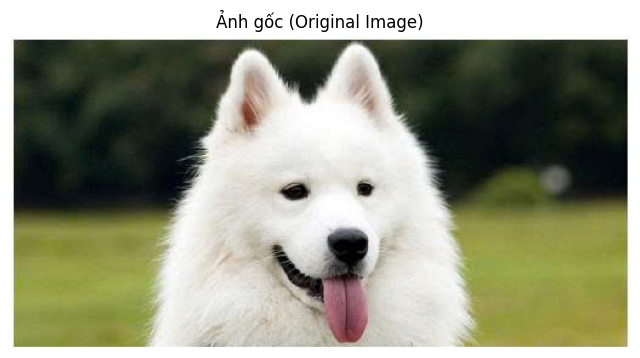


Nguyễn Thành Luân - 6351071043


In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

%matplotlib inline

image = Image.open('dog.png')

plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(image)
plt.title("Ảnh gốc (Original Image)")
plt.show()
print("\nNguyễn Thành Luân - 6351071043")

2. Tiền xử lý dữ liệu ảnh
Chúng ta cần chuyển đổi ảnh từ dạng ma trận 3 chiều (Cao x Rộng x 3 kênh màu RGB) thành ma trận 2 chiều (Số lượng pixel x 3) để đưa vào thuật toán k-Means .

In [2]:

imarr = np.array(image)

rows = imarr.shape[0]
cols = imarr.shape[1]
depth = imarr.shape[2]

print("\nNguyễn Thành Luân - 6351071043")
print(f"Kích thước ảnh gốc: {rows} x {cols} pixels")
print(f"Số kênh màu: {depth}")

data = imarr / 255.0

data = data.reshape(rows * cols, depth)

print(f"Kích thước dữ liệu sau khi reshape (để đưa vào k-Means): {data.shape}")


Nguyễn Thành Luân - 6351071043
Kích thước ảnh gốc: 257 x 511 pixels
Số kênh màu: 3
Kích thước dữ liệu sau khi reshape (để đưa vào k-Means): (131327, 3)


3. Thực hiện Gom cụm màu sắc (k-Means)

Chúng ta sẽ gom hàng ngàn màu sắc khác nhau của ảnh về 32 nhóm màu chủ đạo (n_clusters=32) . Lưu ý: Quá trình này có thể mất vài giây đến 1 phút tùy độ phân giải ảnh.

In [3]:

k_colors = 32

print(f"Đang thực hiện gom màu xuống còn {k_colors} màu... Vui lòng đợi.")

kmeans = KMeans(n_clusters=k_colors, random_state=42, n_init=10)
kmeans.fit(data)

new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

print("Đã gom cụm xong!")
print("\nNguyễn Thành Luân - 6351071043")

Đang thực hiện gom màu xuống còn 32 màu... Vui lòng đợi.
Đã gom cụm xong!

Nguyễn Thành Luân - 6351071043


4. Tái tạo và Hiển thị kết quả
Sau khi có màu mới, ta cần "trả lại hình dáng" cho bức ảnh (reshape về kích thước ban đầu) và hiển thị so sánh


Nguyễn Thành Luân - 6351071043


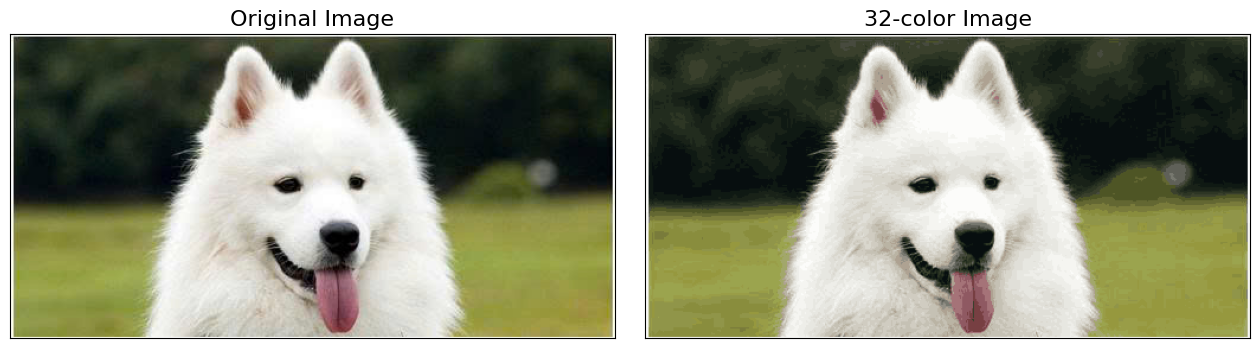

In [4]:
print("\nNguyễn Thành Luân - 6351071043")
img_recolored = new_colors.reshape(rows, cols, depth)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)

ax[0].imshow(image)
ax[0].set_title('Original Image', size=16)

ax[1].imshow(img_recolored)
ax[1].set_title(f'{k_colors}-color Image', size=16)

plt.show()

5. Lưu ảnh kết quả
Cuối cùng, lưu bức ảnh đã giảm màu xuống ổ đĩa của Colab. Bạn có thể tải file này về máy để kiểm tra dung lượng .

In [5]:
print("\nNguyễn Thành Luân - 6351071043")
img_recolored_uint8 = (img_recolored * 255).astype(np.uint8)

new_img = Image.fromarray(img_recolored_uint8)

filename = 'compressed_dog_32_colors.png'
new_img.save(filename)

print(f"Đã lưu ảnh nén thành công: {filename}")


Nguyễn Thành Luân - 6351071043
Đã lưu ảnh nén thành công: compressed_dog_32_colors.png
